In [1]:
import wfdb
from plot_helper import peaks_hr

[130, 355, 582, 807, 1023, 1236, 1451, 1672, 1896, 2123, 2347, 2568, 2788, 3014, 3243, 3472, 3700, 3919, 4136, 4355, 4575, 4798, 5024, 5245, 5460, 5675, 5895, 6121, 6347, 6571, 6790, 7006, 7223, 7446, 7669, 7893, 8115, 8329, 8540, 8754, 8972, 9195, 9417, 9633, 9854]


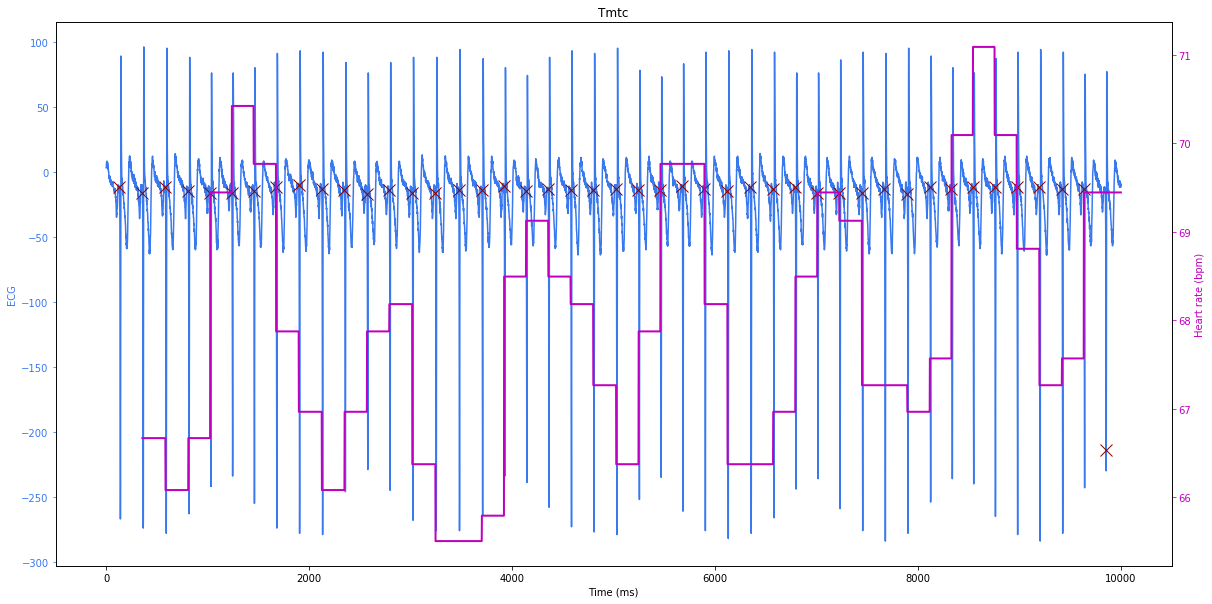

[139, 364, 591, 816, 1032, 1245, 1460, 1681, 1905, 2132, 2356, 2577, 2798, 3023, 3252, 3481, 3709, 3929, 4145, 4364, 4585, 4807, 5033, 5254, 5469, 5684, 5904, 6130, 6356, 6581, 6799, 7015, 7232, 7455, 7678, 7902, 8124, 8338, 8549, 8763, 8982, 9204, 9426, 9642, 9855]


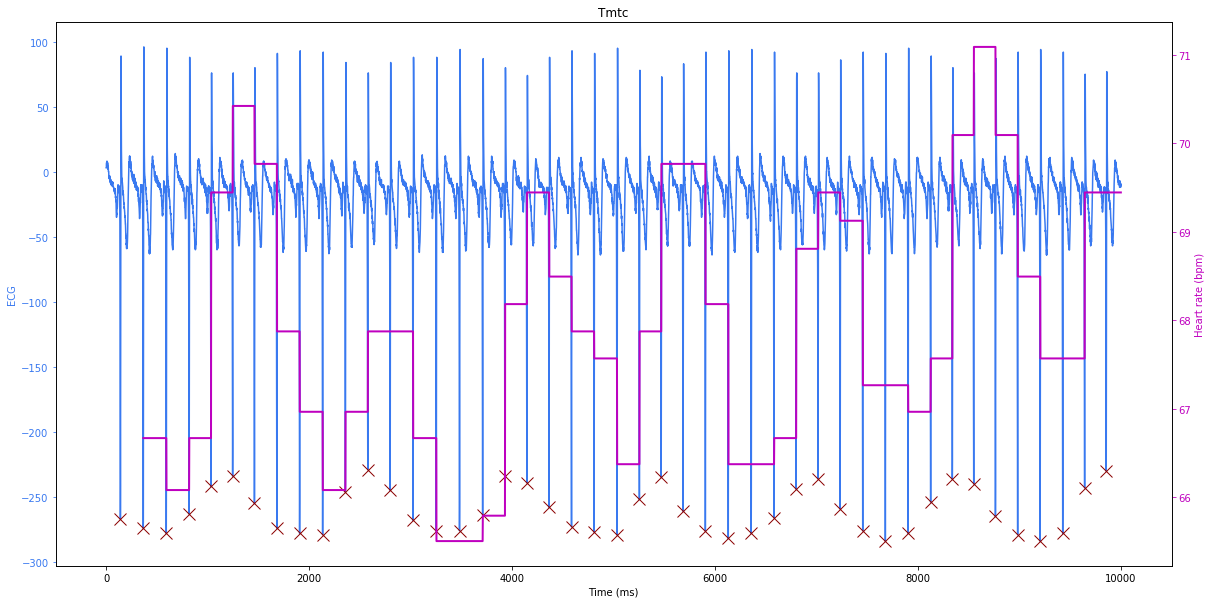

In [2]:
data_dir = 'data/'
challenge_training = ('challenge/2014/training', ['1009', '1016', '1019', '1020', '1022', '1023', '1028', '1032', '1033', '1036', '1043', '1069', '1071', '1073', '1077', '1169', '1195', '1242', '1284', '1354', '1376', '1388', '1447', '1456', '1485', '1503', '1522', '1565', '1584', '1683', '1686', '1715', '1742', '1774', '1804', '1807', '1821', '1858', '1866', '1900', '1906', '1954', '1993', '1998', '2041', '2063', '2132', '2164', '2174', '2201', '2203', '2209', '2247', '2277', '2279', '2283', '2296', '2327', '2370', '2384', '2397', '2469', '2527', '2552', '2556', '2602', '2639', '2664', '2714', '2728', '2732', '2733', '2798', '2800', '2812', '2839', '2850', '2879', '2885', '2886', '2907', '2923', '2970', '3188', '3266', '41024', '41025', '41081', '41164', '41173', '41180', '41566', '41778', '41951', '42228', '42511', '42878', '42961', '43247'])
challenge_testing = ('challenge/2014/testing', ["1002", "1004", "1006", "1008", "1013", "1014", "1017", "1018", "1021", "1025", "1026", "1027", "1029", "1030", "1034", "1035", "1037", "1040", "1045", "1047", "1049", "1053", "1054", "1055", "1056", "1067", "1074", "1076", "1078", "1079", "1085", "1138", "1159", "1162", "1165", "1187", "1210", "1233", "1240", "1243", "1248", "1253", "1256", "1258", "1265", "1270", "1277", "1278", "1299", "1306", "1322", "1331", "1344", "1348", "1353", "1378", "1382", "1392", "1393", "1402", "1407", "1418", "1448", "1473", "1518", "1540", "1582", "1604", "1608", "1641", "1648", "1682", "1710", "1718", "1729", "1732", "1744", "1754", "1764", "1781", "1813", "1814", "1862", "1868", "1871", "1882", "1884", "1896", "1917", "1939", "1955", "2032", "2036", "2062", "2084", "2089", "2095", "2108", "2130", "2141", "2146", "2149", "2155", "2170", "2192", "2193", "2200", "2232", "2254", "2267", "2286", "2300", "2304", "2306", "2330", "2346", "2354", "2398", "2400", "2409", "2438", "2467", "2472", "2492", "2501", "2506", "2516", "2539", "2541", "2566", "2573", "2600", "2605", "2606", "2609", "2617", "2627", "2645", "2646", "2647", "2655", "2659", "2674", "2683", "2710", "2720", "2739", "2769", "2802", "2804", "2826", "2855", "2883", "2884", "2930", "2933", "2935", "2948", "2949", "2974", "2978", "3038", "3136", "3187", "3201", "41038", "41041", "41144", "41165", "41183", "41186", "41219", "41241", "41329", "41345", "41346", "41349", "41486", "41564", "41569", "41749", "41750", "41773", "41826", "41952", "42051", "42445", "42446", "42447", "42512", "42571", "42618", "42619", "42713", "42730", "42731", "42745", "42746", "42783", "42828", "42849", "42850", "42873", "42918", "42960", "42962", "42963", "42964", "43003", "43246"])
challenge_setp = ('challenge/2014/set-p', ["100", "101", "102", "103", "104", "105", "106", "107", "108", "109", "110", "111", "112", "113", "114", "115", "116", "117", "118", "119", "120", "121", "122", "123", "124", "125", "126", "127", "128", "129", "130", "131", "132", "133", "134", "135", "136", "137", "138", "139", "140", "141", "142", "143", "144", "145", "146", "147", "148", "149", "150", "151", "152", "153", "154", "155", "156", "157", "158", "159", "160", "161", "162", "163", "164", "165", "166", "167", "168", "169", "170", "171", "172", "173", "174", "175", "176", "177", "178", "179", "180", "181", "182", "183", "184", "185", "186", "187", "188", "189", "190", "191", "192", "193", "194", "195", "196", "197", "198", "199"])


def gqrs_plot(t, t0=0, tf=10000):
    sig, fields = wfdb.srdsamp(t, sampfrom=t0, sampto=tf, channels=[0])
    record = wfdb.rdsamp(t, sampfrom=t0, sampto=tf, channels=[0], physical=False)
    x = record.d_signals[:,0]
    fs = fields['fs']
    peaks_indexes = wfdb.processing.gqrs_detect(x=x, frequency=fs, adcgain=record.adcgain[0], adczero=record.adczero[0], threshold=1.0)
    print(peaks_indexes)
    peaks_hr(x=x, peaks_indexes=peaks_indexes, fs=fs, title="Tmtc")
    min_bpm = 20
    max_bpm = 230
    min_gap = fs*60/min_bpm
    max_gap = fs*60/max_bpm
    peaks_indexes = wfdb.processing.correct_peaks(x=x, peaks_indexes=peaks_indexes, min_gap=min_gap, max_gap=max_gap, smooth_window=150)
    print(sorted(peaks_indexes))
    peaks_hr(x=x, peaks_indexes=sorted(peaks_indexes), fs=fs, title="Tmtc")


gqrs_plot(data_dir + challenge_setp[0] + '/' + challenge_setp[1][2])

In [12]:
import wfdb
t0 = 10000
tf = 20000
sig, fields = wfdb.srdsamp('data/mitdb/100', sampfrom=t0, sampto=tf, channels=[0])
record = wfdb.rdsamp("data/mitdb/100", sampfrom=t0, sampto=tf, channels=[0], physical=False)
x = record.d_signals[:,0]
print(fields['fs'], record.adcgain[0], record.adczero[0])
print(x)
peak_indexes = wfdb.processing.gqrs_detect(x=x, frequency=fields['fs'], adcgain=record.adcgain[0], adczero=record.adczero[0], threshold=1.0)
print(peak_indexes)

360 200.0 1024
[1111 1037  974 ...,  944  953  954]
[269, 578, 882, 1179, 1467, 1768, 2053, 2337, 2632, 2937, 3253, 3549, 3829, 4118, 4410, 4698, 4998, 5297, 5594, 5887, 6170, 6452, 6742, 7045, 7345, 7644, 7934, 8214, 8501, 8783, 9068, 9375, 9680]
